In [4]:
!pip install easyocr

reader = easyocr.Reader(['en'], gpu=False)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

in this notebook i will apply some methodologies and techniques to reduce the cpu uses ans make it more optimised

In [3]:
import torch
import psutil
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [5]:
if torch.cuda.is_available():
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory Allocated: {torch.cuda.memory_allocated(0)/1024**3:.2f} GB")
    print(f"Memory Cached: {torch.cuda.memory_reserved(0)/1024**3:.2f} GB")
else:
    print("GPU not available, using CPU.")

GPU not available, using CPU.


In [6]:
cpu_usage = psutil.cpu_percent(interval=1)
print(f"CPU Usage: {cpu_usage}%")

CPU Usage: 5.0%


In [7]:
# Memory usage
memory_info = psutil.virtual_memory()
print(f"Memory Usage: {memory_info.percent}%")


Memory Usage: 12.7%


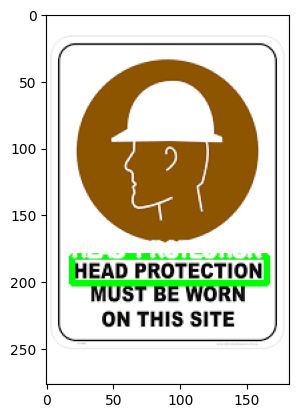

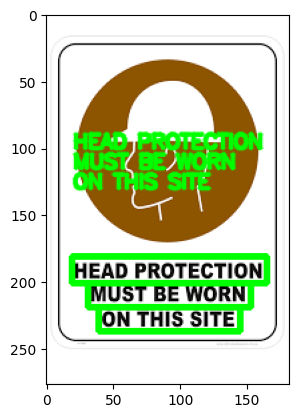

In [8]:
# Load and process image using EasyOCR on CPU
IMAGE_PATH = '/content/sample_data/sign.png'

reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)

# Draw bounding box and text
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
img = cv2.putText(img, text, top_left, font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

# Process and display multiple detections
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
    img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    spacer += 15

plt.imshow(img)
plt.show()
